# Modelo previctivo de supervivencia del Titanic


El objetivo de este trabajo es buscar predecir que pasajero sobrevivio el hundimiento del Titanic. El mismo corresponde a una competencia abierta en kaggle donde se bridan dos datasets. La misma competencia provee un dataset "train.csv" y "test.csv" usadas para el entrenamiento del modelo de machine learning a utilizar y el testeo del mismo.

La estructura de los datos contenidos en ambos data frames es:


- survival: sobrevivo al accidente? 1:si, 0:No
- pclass: Clase en la que abordo, 1 (primera clase), 2 (segunda clase), 3 (tercera clase)
- sex	: Sexo de la persona
- Age	: Edad en años
- sibsp	: Numero de hermanos presentes
- parch	: Numero de padres/hijos abordo ( si habia padres solos o parejas)
- ticket: Numero de Ticket
- fare:	Costo del pasaje que abono
- cabin:	Numero de cabina
- embarked:	Puerto donde embarco

La hipotesis inicial es que la franaja poblacional con mayor probabilidad fue mujeres en primera clase, tambien se busca identificar que variables van a influir sobre la probabilidad de sobrevivir el hundimietno.


In [255]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import sklearn
from sklearn.neighbors import KNeighborsClassifier

In [256]:
df= pd.read_csv("train.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [257]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Solo 3 columnas contienen datos nulos siendo la columna "edad" la que mayores registros nulos tiene. Esto puede ser debido a que eran bebes o incluso hbain nacido durante el viaje y su edad no habia sido registrada.

## Evaluo la tasa de supervivencia dentro del dataset train:

In [258]:
a=df["Survived"].value_counts()
a

0    549
1    342
Name: Survived, dtype: int64

## Numero de pasajeros totales en este set:

In [259]:
df["Survived"].count()

891

## Grafico la tasa de supervivencia de mi dataset train:

Busco ver cuantas personas no sobrevivieron del total de las personas presentes en el dataset

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


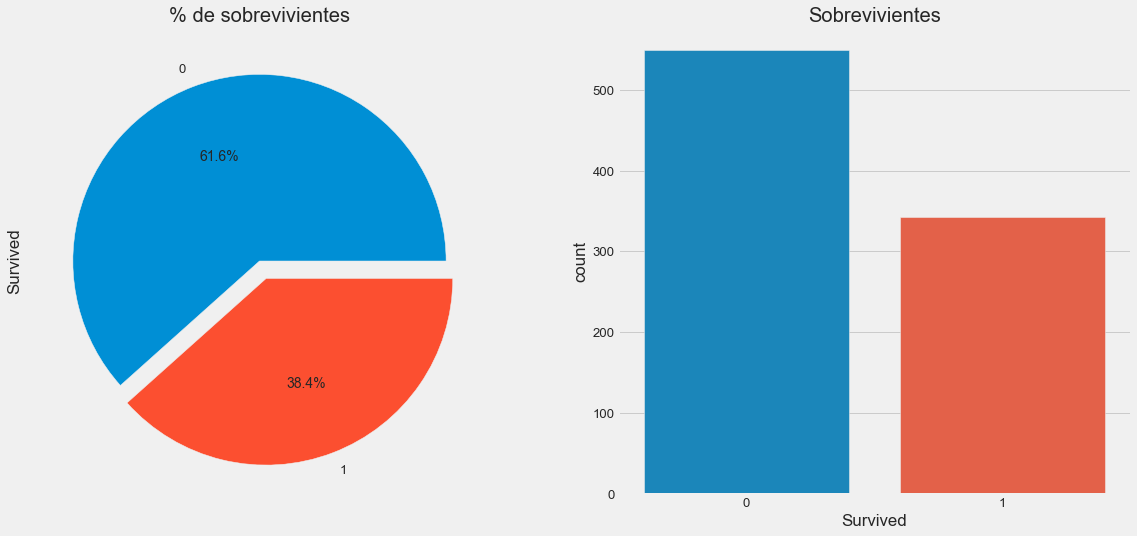

In [260]:
f,ax=plt.subplots(1,2,figsize=(18,8))
a.plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('% de sobrevivientes')

sns.countplot(x=df["Survived"],ax=ax[1])
ax[1].set_title('Sobrevivientes')
plt.show()

De un total de 891 individuos presentes en el data set, puede verse que solo un 61,6% de los pasajeros sobrevivio mientras que el 38,4% de los mismos no lo hizo

## Distribucion de Hombres vs mujeres en el barco:

Busco ver como era la relacion entre hombres y mujeres en el barco y si el sexo de una persona pudo haber influido en la tasa de superviviencia de la misma o simplemente   una mayor frecuencia de alguno de los generos puede influenciar en la conclusion.

In [261]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [262]:
b=df["Sex"].value_counts()
c=df["Sex"].count()
b

male      577
female    314
Name: Sex, dtype: int64

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


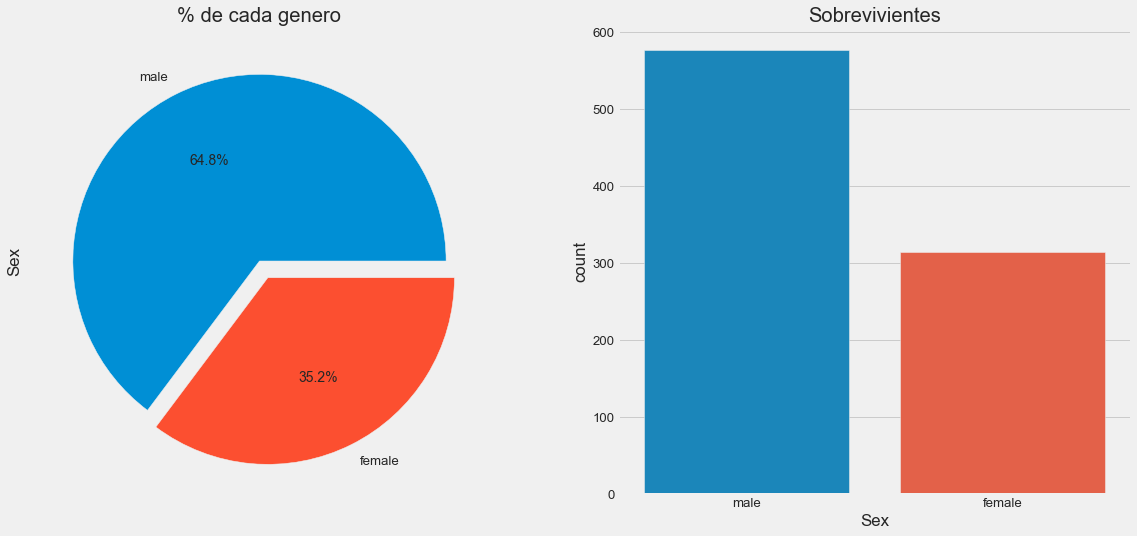

In [263]:
f,ax=plt.subplots(1,2,figsize=(18,8))
b.plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('% de cada genero')

sns.countplot(x=df["Sex"],ax=ax[1])
ax[1].set_title('Sobrevivientes')
plt.show()

Podemos ver que habia muchos mas hombres que mujeres en el barco. Paso a analizar como se relaciona el genero con la tasa de supervivencia.

In [264]:
d=df.groupby(["Sex","Survived"])["Survived"].count()
d

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

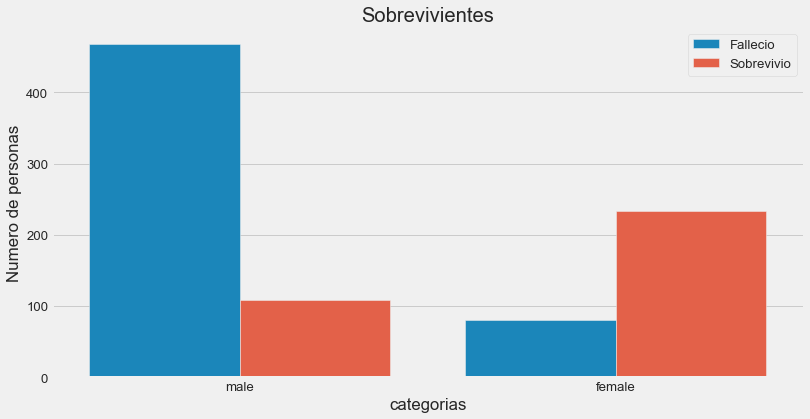

In [265]:
f,ax=plt.subplots(figsize=(12,6))
sns.countplot(x=df["Sex"],hue=df['Survived'])
ax.set_title('Sobrevivientes')
ax.set_ylabel('Numero de personas')
ax.set_xlabel('categorias')
plt.legend(labels = ['Fallecio', 'Sobrevivio'])

plt.show()

Puede verse que pese a haber muchos mas hombres a bordo del barco, la tasa de supervivencia de los mismos fue considerablemente menor que el de las mujeres

## Supervivencia/Clase

Analizo las diferencias en la tasa de supervivencia dependiendo de la clase en la que iban a bondo y como esta variable se relaciona con las otras previamente analizadas (sexo)

In [266]:
df[["Survived", "Pclass"]].groupby(by=("Pclass")).count()

,Survived
Pclass,
1,216
2,184
3,491


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


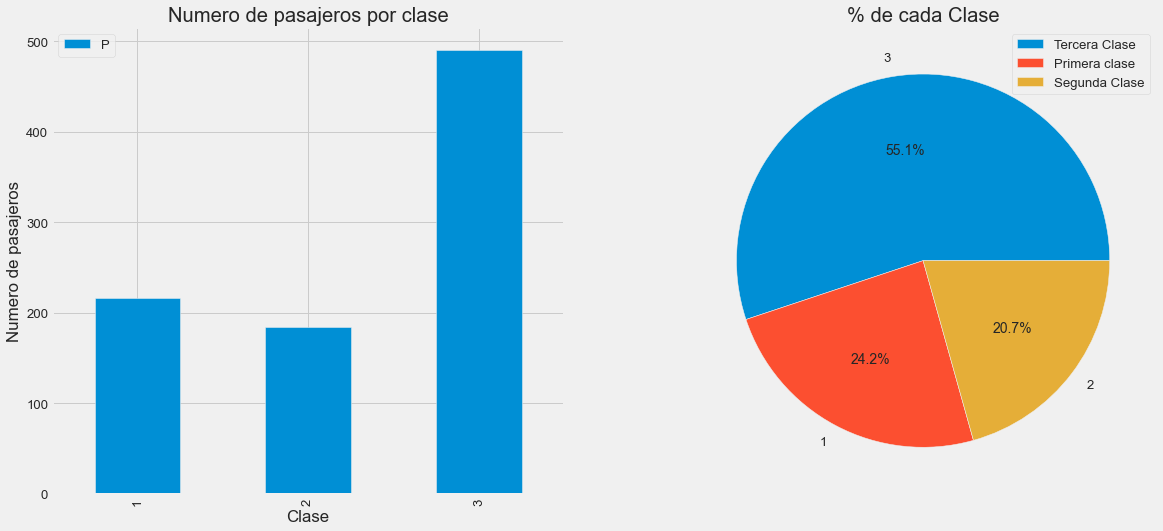

In [267]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df[["Survived", "Pclass"]].groupby(by=("Pclass")).count().plot.bar(ax=ax[0])
ax[0].set_title('Numero de pasajeros por clase')
ax[0].set_ylabel('Numero de pasajeros')
ax[0].set_xlabel('Clase')
ax[0].legend("Pasajeros")



#pie al lado para saber el porcentaje, en ungrafico partido
df["Pclass"].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1])
ax[1].set_title('% de cada Clase')
ax[1].set_ylabel("")
ax[1].legend(labels = ['Tercera Clase', 'Primera clase','Segunda Clase'])


Gran parte de los pasajeros presentes se encontraban a bordo de la tercera clase. Paso a ver cual fue la tasa de supervivencia dentro de cada clase

In [268]:
df[["Survived","Pclass", "Ticket"]].groupby(["Survived", "Pclass"]).count()

Ticket
Survived Pclass        
0        1           80
         2           97
         3          372
1        1          136
         2           87
         3          119

In [269]:
df[["Survived","Pclass"]].groupby(["Pclass"]).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

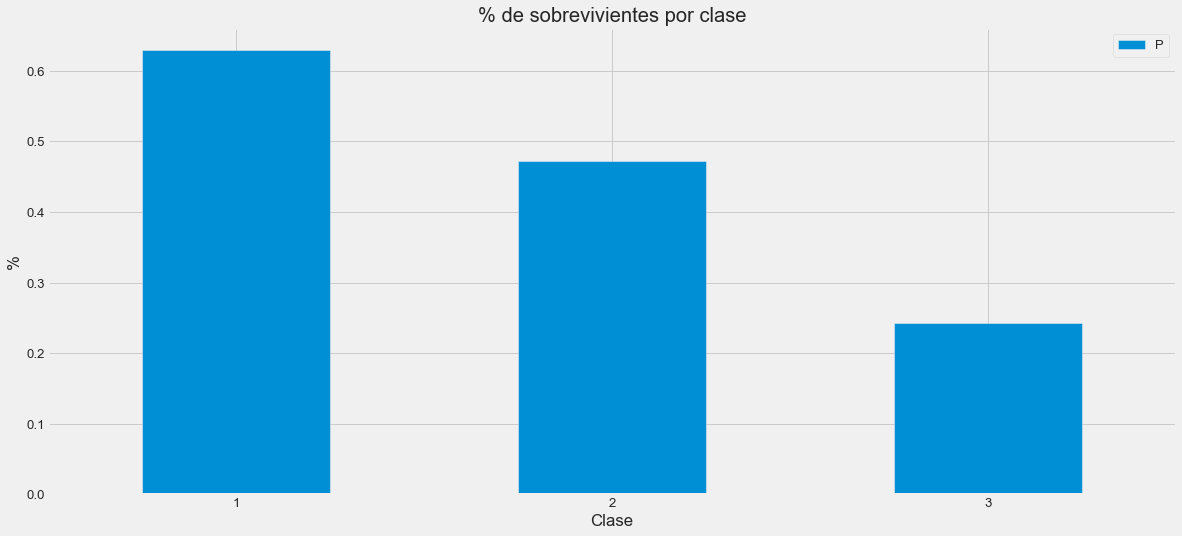

In [270]:
f,ax=plt.subplots(figsize=(18,8))
df[["Survived", "Pclass"]].groupby(by=("Pclass")).mean().plot.bar(ax=ax)
ax.set_title('% de sobrevivientes por clase')
ax.set_ylabel('%')
ax.set_xlabel('Clase')
ax.legend("Pasajeros")
plt.xticks(rotation = 0)

Veo que pese a ser la mayoria de los pasajeros, las personas que viajaban en tercera clase tuvieron una menor tasa de supervivencia mientras que los de primera, que eran solo un 24% de los pasajeros tuvieron una tasa de superviviencia por encima del 60%

## Tasa de supervivencia discriminado por el sexo y la clase

Paso a integrar las variables analizadas hasta ahora

In [271]:
df.groupby(["Survived","Sex","Pclass"])[["Pclass"]].count()

Pclass
Survived Sex    Pclass        
0        female 1            3
                2            6
                3           72
         male   1           77
                2           91
                3          300
1        female 1           91
                2           70
                3           72
         male   1           45
                2           17
                3           47

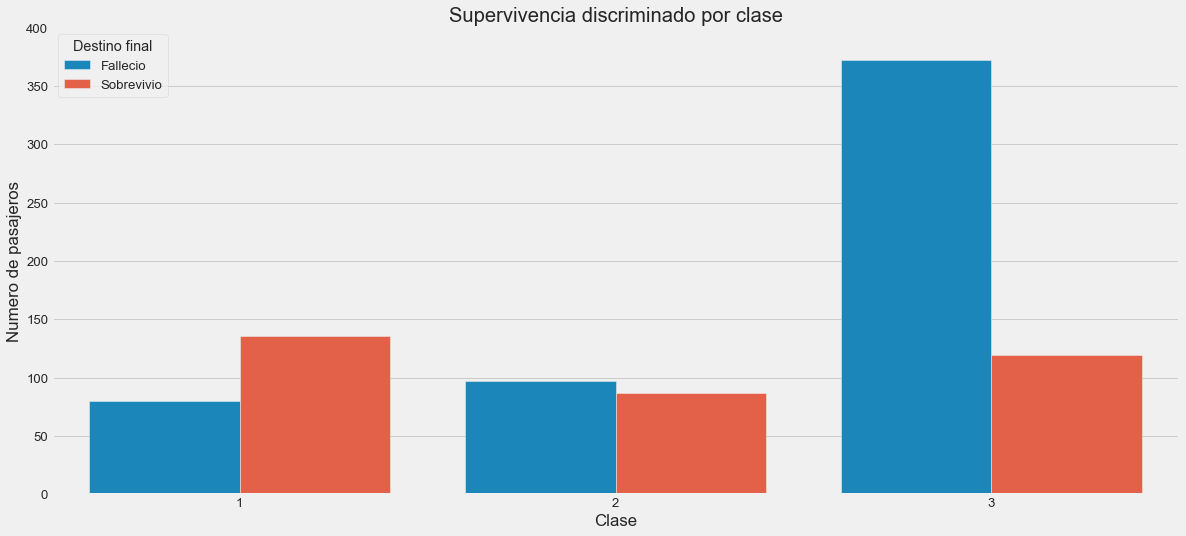

In [272]:
f,ax=plt.subplots(figsize=(18,8))
sns.countplot(x=df["Pclass"], hue=df["Survived"],ax=ax)
ax.set_title('Supervivencia discriminado por clase')
ax.set_ylabel('Numero de pasajeros')
ax.set_xlabel('Clase')
ax.set_ylim(0,400)
ax.legend(title='Destino final', loc='upper left', labels=['Fallecio', 'Sobrevivio'])
plt.show()

Se puede ver que las personas pertenecientes a la terecera clase tenian una menor tasa de superviviencia que cualquiera de los otros grupos a pesar de ser un 55% del total de los pasajeros. Sumado al analisis discriminado por genero, llevaria a suponer que los individuos con menor tasa de superviviencia serian los hombres de tercera clase.


Al hacer el analisis de lo que fue la superviviencia de los pasajeros puede verse que el sexo de la persona y la clase fueron factores que influyeron, siendo los hombres de tercera clase los de menor probabilidad de sobrevivir, seguido por los hombres de segunda clase, los hombres de primera clase. Paralelamente, el grupo poblacional con mas probabilidad de supervivencia fueron las mujeres de primer, segunda y tercer clase respectivamente.

##  Ultimas variables categoricas del dataset:

Investigar si hubo diferencias en las tasa de supervivencia dependiendo del lugar de embarque.

In [273]:
df[["Survived","Ticket","Embarked" ]].groupby(["Survived","Embarked"]).count()

Ticket
Survived Embarked        
0        C             75
         Q             47
         S            427
1        C             93
         Q             30
         S            217

In [274]:
df[["Survived","Ticket","Embarked" ]].groupby("Embarked").mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


Aquellos pasajeros que embarcaron en la terminal "C" tuvieron una mayor tasa de supervivencia, seguramente porque en esa terminal la mayoria de las personas que embarcaron estaban en primera clase o incluos porque embarcaron mas mujeres.

Text(0.5, 0, 'Lugar de embarque')

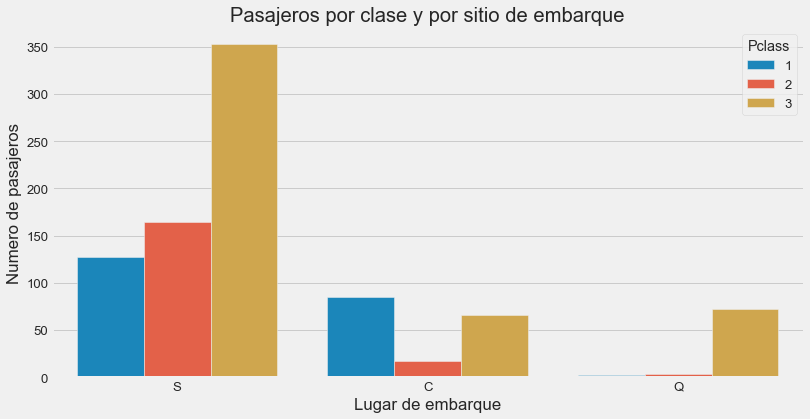

In [275]:
f,ax=plt.subplots(figsize=(12,6))
sns.countplot(x=df["Embarked"],hue=df['Pclass'])
ax.set_title('Pasajeros por clase y por sitio de embarque')
ax.set_ylabel('Numero de pasajeros')
ax.set_xlabel('Lugar de embarque')

Se puede ver que la mayoria de los pasajeros que embarcaron en la locacion "C" eran de primera clase y como vimos anteriormente este era el grupo de personas que tuvo mas chances de sobrevivir

## Pclase y embarque vs superviviencia

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

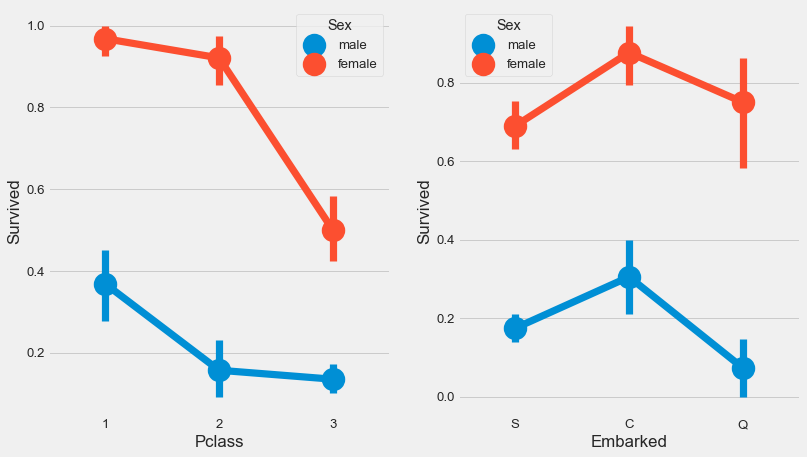

In [276]:
f,ax=plt.subplots(1,2,figsize=(12,7))
sns.pointplot(data=df,x='Pclass', y='Survived', hue="Sex", ax=ax[0])
sns.pointplot(data=df,x='Embarked', y='Survived', hue="Sex", ax=ax[1])

Logro graficar todas las variables categoricas y su relacion con la tasa de supervivencia. Hasta ahora loq ue logre observar fue que:

- Las mujeres tienen una mayora probabilidad que los hombres
- Los pasajeros de primera clase tienen mayor tasa de supervivencia que los de segunda y estos por encima de los de la tercera


Restan por evaluar el impacto de las edades de la personas, cuanto pago por el ticket (si incluso existen diferencias entre la tasa de supervivencia dentro de cada clase dependiendo de cuanto pago por el ticket) y si al viajar solo tuvo mas o menos chances de sobrevivir.

In [277]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Primer aproximacion de un modelo predictivo:

Con la informacion que acabo de ver quiero hacer una primer aproximacion de un modelo predictivo. Al tratarse de un problema de clasificacion supervisada los modelos que puedo utilizar seran un arbol de decision, k-nearest neighbor o una regresion logistica.

Hasta ahora las variables que evalue fueron:

- El sexo
- La clase

Si bien no espero que solo estas dos variables alcancen para construir un modelo predictivo robusto quiero ver como desempeñan. Lo primero que tengo que hacer es convertir las variables de la columna "Sexo" del dataframe a variables numericas para poder usarlas para entrenar al modelo.

In [278]:
data_binaria=df

In [279]:
data_binaria["Sexo"]=data_binaria["Sex"].map({'male': 0, 'female': 1})

In [280]:
entry_modelo=data_binaria.drop(["PassengerId", "Name", "Sex","Age", "SibSp","Parch","Ticket","Fare","Cabin","Embarked"], axis=1)

In [281]:
entry_modelo  #informacion quese le va a limentar al modelo para entrenarlo

,Survived,Pclass,Sexo
0,0,3,0
1,1,1,1
2,1,3,1
3,1,1,1
4,0,3,0
...,...,...,...
886,0,2,0
887,1,1,1
888,0,3,1
889,1,1,0


### Separo mi data labeleada en "entry_modelo" para poder ver la capacidad predictiva del modelo

Con el "Entry modelo" lo que voy a hacer es separarlo en dos para tener infromacion de verdad a campo para ver como se desempeña el modelo elegido

In [282]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(entry_modelo, test_size=0.2)

In [283]:
comparacion=test.copy()
comparacion

,Survived,Pclass,Sexo
501,0,3,1
138,0,3,0
561,0,3,0
400,1,3,0
118,0,1,0
...,...,...,...
39,1,3,1
581,1,1,1
795,0,2,0
392,0,3,0


In [284]:
test=test.drop("Survived", axis=1)
test

,Pclass,Sexo
501,3,1
138,3,0
561,3,0
400,3,0
118,1,0
...,...,...
39,3,1
581,1,1
795,2,0
392,3,0


In [285]:
train

,Survived,Pclass,Sexo
594,0,2,0
213,0,2,0
585,1,1,1
787,0,3,0
202,0,3,0
...,...,...,...
154,0,3,0
603,0,3,0
613,0,3,0
762,1,3,0


#### Aplicacion de un modelo predictivo

Una vez separados y formateados ambos datasets para compatibilizarlos puedo elegir un modelo predictivo. Seleccionando alguno de los que vimos en la clase veo como es la capacidad predictiva del un modelo de "K-nearest neighbours".


Primero separo las variables que voy a usar como predictivas y la variable objetivo:

## Paso a fittear el modelo

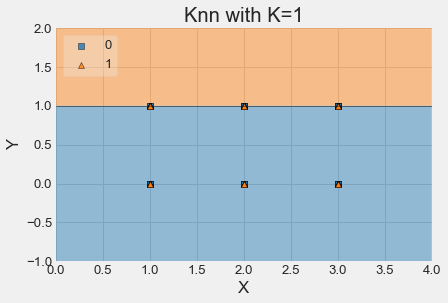

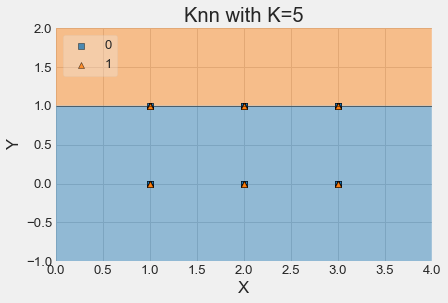

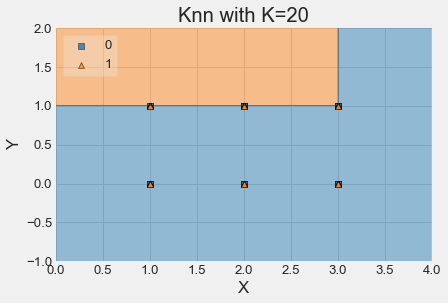

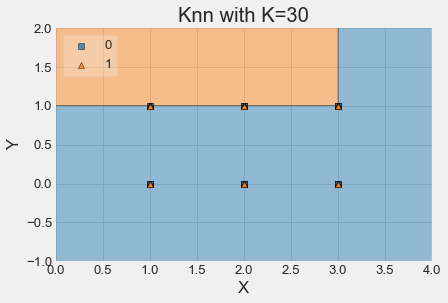

In [286]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions



def knn_comparison(data, k): # funcion de comparacion
 x = train[['Pclass','Sexo']].values # Extraccion de columns
 y = train['Survived'].astype(int).values # Clase y como int
 clf = neighbors.KNeighborsClassifier(n_neighbors=k) #algoritmo
 clf.fit(x, y)# Graficar la region de decision
 plot_decision_regions(x, y, clf=clf, legend=2)# Añadir anotaciones
 plt.xlabel('X')
 plt.ylabel('Y')
 plt.title('Knn with K='+ str(k))
 plt.show()


# Cargar y aplicar funcion
data1 = entry_modelo
for i in [1,5,20,30]: # Para diferentes valores de k (Knn)
    knn_comparison(data1, i)

In [287]:
X_train = train.drop('Survived', axis = 1)
Y_train = train['Survived']
X_test = test.copy()
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (712, 2)
Y_train shape:  (712,)
X_test shape:  (179, 2)


In [288]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

Se puede ver que pese a usar solo dos variables en el modelo de Knn el accuracy fue de 79,49

In [289]:
Y_pred

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0], dtype=int64)

In [290]:
y_test=comparacion["Survived"]

In [291]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, Y_pred)*100)

79.3296089385475


## Se puede ver que pese a usar solo dos variables en el modelo de Knn el accuracy fue de 78,2%

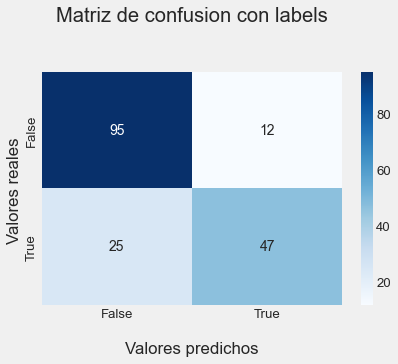

In [292]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, Y_pred)
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de confusion con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
## Ticket labels - En orden alfabetico
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

## Evaluacion de otro modelo predictivo:

Pruebo con regresiones logisticas a ver como es el accuracy con ese modelo.

In [293]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
train, test = train_test_split(entry_modelo, test_size=0.2)

comparacion=test.copy()
test=test.drop("Survived", axis=1)
test

#separo las variables predictoras y la que busco predecir
X_train = train.drop('Survived', axis = 1)
Y_train = train['Survived']
X_test = test
Y_test = comparacion["Survived"]

model = LogisticRegression(max_iter=10000, n_jobs=-1) 
# Ajustar modelo
model.fit(X_train, Y_train) 

#Predicciones
Y_pred = model.predict(X_test)
Y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0], dtype=int64)

In [300]:
print(accuracy_score(Y_test, predicciones)*100)

50.27932960893855


## Se puede ver que pese a usar solo dos variables en el modelo de rgresion logistica el accuracy fue de 50,2%

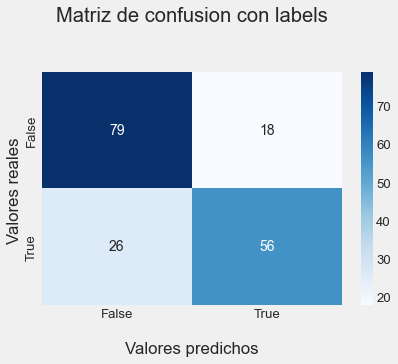

In [295]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(Y_test, Y_pred)
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de confusion con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
## Ticket labels - En orden alfabetico
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

## En las proximas semanas voy a estar trabajando con las variables continuas con el objetivo de mejorar la capacidad predictiva del modelo

## Evaluacion de variables numericas 

Paso a hacer una evaluaciond de las variables numericas para ver caul de ellas estan realcionadas con la supervivencia del pasajero

## Valor del pasaje

<AxesSubplot:xlabel='Fare', ylabel='Count'>

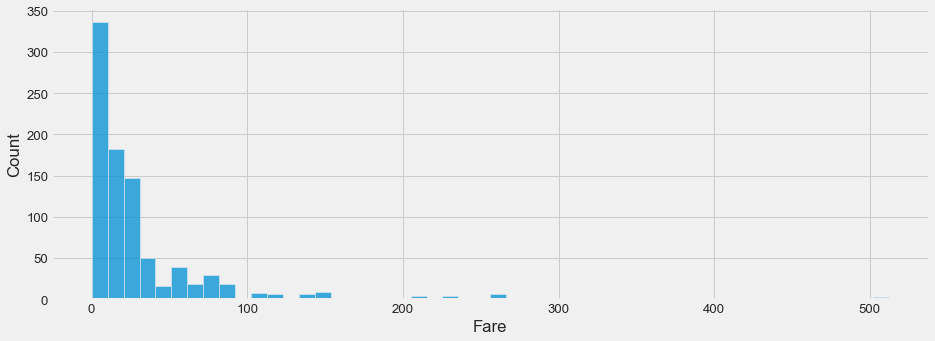

In [296]:
plt.figure(figsize=(14, 5))
sns.histplot(data=df,x="Fare",bins=50)


Se puede ver que gran parte de los tickets vendidos corresponden a pasajes baratos, seguramente de tercera clase

## Efecto edad en la probabiidad de sobrevivir de la persona

Paso a analizar como la edad afecto la probabilidad de sobrevivir del pasajero

<AxesSubplot:xlabel='Age', ylabel='Count'>

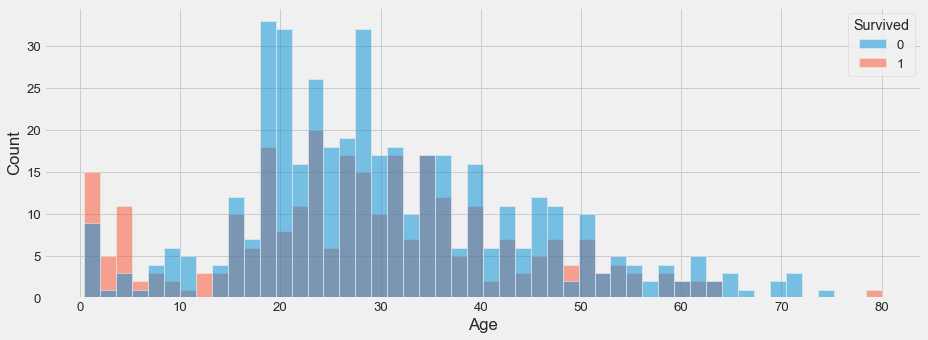

In [297]:
plt.figure(figsize=(14, 5))
sns.histplot(data=df,x="Age",bins=50, hue="Survived")

Se ve que gran parte de las personas a bordo estaban entre los 20 y 30 años y que en su gran mayoria no sobrevivieron. Vale la pena tener en cuenta esta variable al momento del diseño del modelo predictivo.

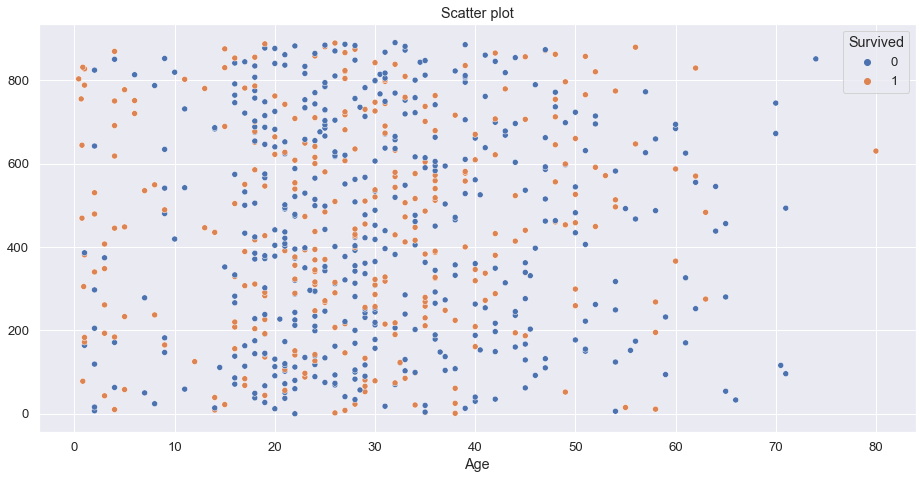

In [298]:
sns.set_theme(font_scale=1.2) # set theme for plots

plt.figure(figsize=(14, 7))
sns.scatterplot(data=df,x="Age",y=range(df.Ticket.count()),hue="Survived")

plt.title("Scatter plot")
plt.show()